<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics

# Assignment: Task 1
---

The completion of **Portfolio Task 1: Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries** is worth **20%** towards your portfolio for the UFCFFY-15-M Cyber Security Analytics (CSA) module. Please refer to your Assignment Overview for full details.

### Portfolio Task 1: Conduct an investigation on a web application to identify malicious attack activity using Python data science libraries (20%)
---

For this task, you will be provided with a *personalised* dataset that you are expected to analyse. You should aim to identify any suspicious activities that have occurred in the dataset, based on your knowledge and understanding of web application security. You will need to ensure that your submission is made based on the information in your assigned dataset - **failure to use the dataset assigned to your username will result in a zero grade**. Your portfolio submission for this task should be an HTML export of your IPYNB Jupyter notebook that details your investigation using appropriate code cells to perform the required analysis and Markdown cells to explain your work.

As a cyber security analyst, you have been provided with a set of logs related to your organisation web server. You will need to analyse these logs and seek out suspicious activity based on the data available.

More information about Microsoft Internet Information Services (IIS) can be found at the following URL:
https://docs.microsoft.com/en-us/previous-versions/iis/6.0-sdk/ms525410(v=vs.90)

**Dataset**: Please see the folder ***"Portfolio Assignment"*** under the Assignment tab on Blackboard for further detail related to the access and download of the necessary dataset.

**Hint:** The [TryHackMe room "HTTP in detail"](https://tryhackme.com/room/httpindetail) may help your research for what to investigate within this large dataset.


### Assessment and Marking
---

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Identification of the suspicious activity (25%)** | No evidence of progress | A limited attempt to address this criteria | Some correct detail is identified but perhaps not all | Most correct detail is identified | All correct detail identified with good justification | All correct detail identified with excellent justification |
| **Analytical reasoning and process (25%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of analysis but perhaps some flaws in the approach | Evidence of analysis with only some minor flaws | Very good analytical approach | Excellent analytical approach |
| **Python and Pandas proficiency (25%)**  | No evidence of progress | A limited attempt to address this criteria |  Some fair usage but perhaps not optimal | Good usage of Python and Pandas with only minor flaws | Very good usage of in-built functions | Excellent professional usage of in-built functions |
| **Clarity and professional report presentation (25%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary but with major flaws | Markdown commentary with only minor flaws | Very good detail in markdown commentary | Excellent detail in markdown commentary |

To achieve the higher end of the grade scale, you need to demonstrate how you have conducted your investigating, identifying the malicious activity, and demonstrate a good command of Pandas data analysis to conduct your investigation.

### Submission Documents
---

Your submission for this task should include:

- **1 Jupyter Notebook exported in HTML format**. You should complete your work using the iPYNB file provided (i.e., this document). You should also complete the self-assessment section (below). Once you have completed your work, you should use the export function in Jupyter to save your notebook as an HTML document. ***Do not submit a ipynb file - we will not execute any code during marking. Therefore, you must ensure that all cell output is clear in your HTML document for your marker.***

Your portfolio should be submitted to Blackboard by **14:00 on 12th May 2022**. This should should be a ZIP file that contains four documents:

- ***Task1.html*** (an HTML document exported from Jupyter notebook) 
- ***Task2.html*** (an HTML document exported from Jupyter notebook)
- ***Task3.pdf*** (a PDF report of your research investigation)
- ***Task4.txt*** (a text file that contains instructions for accessing your video)

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.


- **Identification of the suspicious activity (25%)**: You estimate that your grade will be ___24%_____.

- **Analytical reasoning and rationale (25%)**: You estimate that your grade will be __24%______.

- **Python and Pandas proficiency (25%)**: You estimate that your grade will be ___22%_____.

- **Clarity and professional report presentation (25%)**: You estimate that your grade will be __24%______.


Please provide a minimum of two sentences to comment and reflect on your own self-assessment: ________. ________.


### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You should use the [online Q&A form](https://forms.office.com/r/cB8iDH5BXf) to ask questions related to this module and this assignment, as well as utilising the on-site teaching sessions.

---

## Importing the libraries

In [1]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

## Importing the dataset

My UWE User ID is **s5-ahsan** and the given dataset has been linked as below

In [2]:
data_file = 's5-ahsan'

In [3]:
# Load in the data set as required - 
data_path = './'
data = pd.read_csv(data_path + data_file, delim_whitespace=True)
#data.to_csv('out.csv')
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,02:22:00,194.77.81.230,GET,jdctmnpf.css,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21
1,2022-01-01,02:22:00,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
2,2022-01-01,02:22:08,194.77.81.230,GET,favico.ico,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
3,2022-01-01,02:22:08,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
4,2022-01-01,02:22:12,194.77.81.230,GET,template.css,v=qoxbvkqa,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70870,2022-01-30,23:26:20,194.77.81.230,GET,transactions.aspx,page=4,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,27
70871,2022-01-30,23:26:46,194.77.81.230,GET,mwwduqjt.css,-,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,24
70872,2022-01-30,23:26:46,194.77.81.230,GET,ufaldnnx.css,-,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,404,0,0,29
70873,2022-01-30,23:26:46,194.77.81.230,GET,template.css,v=ecdjzkma,443,xk388761,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/transactions.aspx,200,0,0,27


In [4]:
data.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,02:22:00,194.77.81.230,GET,jdctmnpf.css,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21
1,2022-01-01,02:22:00,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27
2,2022-01-01,02:22:08,194.77.81.230,GET,favico.ico,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,22
3,2022-01-01,02:22:08,194.77.81.230,GET,index.aspx,-,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,25
4,2022-01-01,02:22:12,194.77.81.230,GET,template.css,v=qoxbvkqa,443,-,194.153.74.142,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,200,0,0,30


In [5]:
# Get all column names
index=data.columns

In [6]:
index

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [7]:
# Get count of each unique value for 'cs(Referer)'
data['cs(Referer)'].value_counts()

https://bankofpunk.local/transactions.aspx         23821
https://bankofpunk.local/index.aspx                18004
https://bankofpunk.local/login.aspx                13583
https://bankofpunk.local/account_status.aspx        6266
-                                                   6045
https://bankofpunk.local/transfer.aspx              1784
https://bankofpunk.local/changepassword.aspx         580
https://bankofpunk.local/faq.aspx                    385
https://bankofpunk.local/transfer_complete.aspx      289
https://bankofpunk.local/change_avatar.aspx          118
Name: cs(Referer), dtype: int64

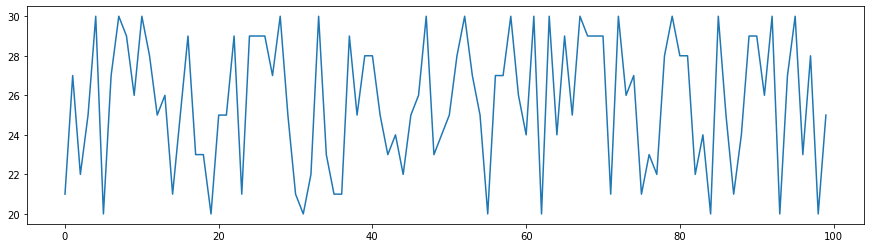

In [8]:
# Plot the first 100 values for the 'time-taken' column
plt.figure(figsize=(15,4))
plt.plot(data['time-taken'][:100])
plt.show()

# Start your investigation...

Carry on with the investigation based on the initial code provided above. Conclude you investigation with a summary of what activities you have identified and why they are deemed to be suspicious.

**STEP 1**: Find which client ip addresses are top in the table from the given dataset. The below table shows ip address **92.42.141.20** is hight. 

In [9]:
# c-ip column value count 
data['c-ip'].value_counts()

92.42.141.20       320
213.172.38.186     195
200.108.172.247    152
80.169.60.109      145
130.176.254.108    143
                  ... 
45.150.243.201      22
91.193.11.217       21
185.202.141.17      21
193.150.182.93      20
194.107.251.82      19
Name: c-ip, Length: 987, dtype: int64

**STEP 2**: Find value count for sc-status (status of the action, represented by a success or error code) code. 

In [10]:
# sc-status column value count 
data['sc-status'].value_counts()

200    59475
404     5921
301     4670
401      809
Name: sc-status, dtype: int64

The **HTTP 401 (Unauthorized) status code** indicates that the request has not been applied because it lacks valid authentication credentials for the target resource.

The **HTTP 404 Not Found** response status code indicates that the server cannot find the requested resource. Links that lead to a 404 page are often called broken or dead links and can be subject to link death, link breaking, or reference rot. Phishers that use a custom 404 not found error page to steal credentials. But we do not get any malicious URL in the dataset.

                                            (Watson, 2017) (Fielding and Reschke, 2014) (Mozilla, 2022) (Gatlan, 2019)

In [11]:
# Search for all unique entries in 'cs(Referer)'
data['cs(Referer)'].unique()

array(['-', 'https://bankofpunk.local/index.aspx',
       'https://bankofpunk.local/login.aspx',
       'https://bankofpunk.local/account_status.aspx',
       'https://bankofpunk.local/transactions.aspx',
       'https://bankofpunk.local/changepassword.aspx',
       'https://bankofpunk.local/transfer.aspx',
       'https://bankofpunk.local/transfer_complete.aspx',
       'https://bankofpunk.local/faq.aspx',
       'https://bankofpunk.local/change_avatar.aspx'], dtype=object)

In [12]:
# sc-status column value count 
data['sc-status'].value_counts()

200    59475
404     5921
301     4670
401      809
Name: sc-status, dtype: int64

**STEP 3**: Find & separate the suspicious HTTP sc-status code. Here, 401 is the most suspicious. 

## **INVESTIGATE HTTP STATUS CODE 401**

In [13]:
# split the rows with 401 sc-status code. 
data_401 = data[data["sc-status"] == 401]

In [14]:
#show all rows
pd.set_option("display.max.row", None)

In [15]:
data_401

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1165,2022-01-01,16:12:48,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/index.aspx,401,0,0,23
1169,2022-01-01,16:12:59,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,20
1173,2022-01-01,16:13:05,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,24
2443,2022-01-02,03:05:35,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,401,0,0,24
2445,2022-01-02,03:06:03,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3193,2022-01-02,10:58:41,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/index.aspx,401,0,0,29
3197,2022-01-02,10:58:53,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3200,2022-01-02,10:58:56,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
3350,2022-01-02,11:55:26,194.77.81.230,POST,login.aspx,-,443,-,149.11.45.29,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,401,0,0,24
3354,2022-01-02,11:55:47,194.77.81.230,POST,login.aspx,-,443,-,149.11.45.29,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,23


The above dataset only for sc-status HTTP code 401. 

In [16]:
# show all rows
pd.set_option("display.max.row", None)

In [17]:
# user last visited site value count from the dataset of HTTP status 401 only.  
data_401['cs(Referer)'].value_counts()

https://bankofpunk.local/login.aspx    633
https://bankofpunk.local/index.aspx    169
https://bankofpunk.local/faq.aspx        7
Name: cs(Referer), dtype: int64

We are watching too many login attempts in the HTTPS status 401 dataset.

# Split above dataset according to cs-method (POST) and cs(referer) login

In [18]:
# split according to cs-method POST and cs(referer) login from the 401 dataset.
data_login = data_401[(data_401["cs-method"].str.contains("POST")) & (data_401["cs(Referer)"].str.contains("login"))]

In [19]:
data_login

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
1169,2022-01-01,16:12:59,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,20
1173,2022-01-01,16:13:05,194.77.81.230,POST,login.aspx,-,443,-,192.149.15.6,Mozilla/4.0+(compatible;+MSIE+5.01;+Windows+NT...,https://bankofpunk.local/login.aspx,401,0,0,24
2445,2022-01-02,03:06:03,194.77.81.230,POST,login.aspx,-,443,-,95.83.228.161,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3197,2022-01-02,10:58:53,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,20
3200,2022-01-02,10:58:56,194.77.81.230,POST,login.aspx,-,443,-,185.49.126.199,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
3354,2022-01-02,11:55:47,194.77.81.230,POST,login.aspx,-,443,-,149.11.45.29,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,23
3388,2022-01-02,12:03:36,194.77.81.230,POST,login.aspx,-,443,-,193.194.26.85,Mozilla/4.0+(compatible;+MSIE+7.0;+Windows+NT+...,https://bankofpunk.local/login.aspx,401,0,0,21
3578,2022-01-02,12:12:29,194.77.81.230,POST,login.aspx,-,443,-,160.238.97.174,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,27
3580,2022-01-02,12:12:51,194.77.81.230,POST,login.aspx,-,443,-,160.238.97.174,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,30
3934,2022-01-02,14:27:56,194.77.81.230,POST,login.aspx,-,443,-,80.231.27.120,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://bankofpunk.local/login.aspx,401,0,0,21


The **POST** method is used to request that the origin server accept the entity enclosed in the request as a new subordinate of the resource identified by the Request-URI in the Request-Line. 

cs-method= POST, cs(Referer)= https://bankofpunk.local/login.aspx and cs-uri-query= login.aspx in the dataset.

In [20]:
data_login['c-ip'].value_counts()

92.42.141.20       242
213.172.38.186     128
200.108.172.247     81
185.77.82.92         3
192.149.15.6         2
144.48.63.132        2
185.218.123.222      2
192.137.146.53       2
95.214.184.103       2
91.148.197.250       2
91.223.94.247        2
74.221.139.230       2
166.49.129.50        2
194.40.72.103        2
192.188.69.64        2
95.131.158.253       2
195.81.240.156       2
193.202.62.158       2
194.88.243.94        2
195.88.156.42        2
195.219.161.51       2
129.36.225.36        2
194.62.189.140       2
46.17.89.170         2
185.88.216.146       2
194.40.82.2          2
195.130.201.185      2
91.237.74.255        2
185.31.154.27        2
91.212.202.183       2
46.248.1.247         2
193.221.118.12       2
128.86.208.254       2
80.154.104.85        2
31.221.40.107        2
185.179.209.134      2
209.127.162.70       2
89.36.24.71          2
130.176.254.108      2
23.90.114.62         2
164.38.16.186        2
2.58.155.177         2
91.230.181.206       2
193.22.80.2

From the above command, we see ip 92.42.141.20 has attemped 242 times for POST login request. That means attacker has tried to guess password to get login. It would be a brute-force attack.

In cryptography, a brute-force attack consists of an attacker submitting many passwords or passphrases with the hope of eventually guessing correctly. The attacker systematically checks all possible passwords and passphrases until the correct one is found. (Wikipedia, 2022)

let's **investigate ip 92.42.141.20**

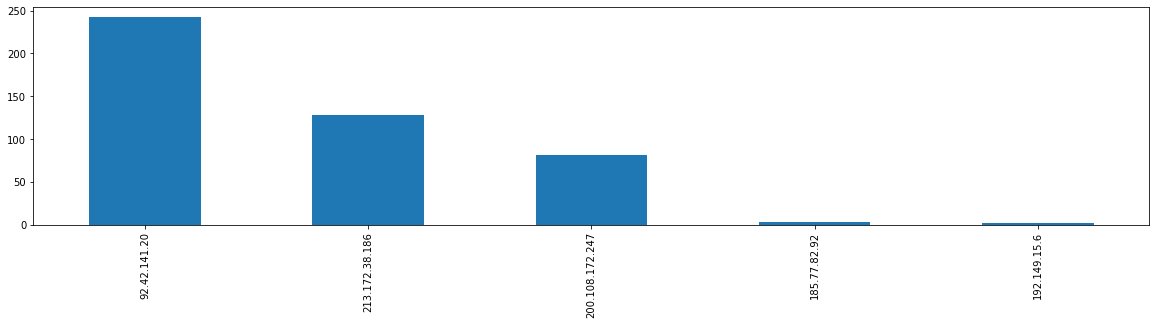

In [21]:
# Bar chart for c-ip vs count from data_login dataset
axx=data_login['c-ip'].value_counts()[:5].plot(kind='bar', figsize=(20,4))

# Create a new dataset where POST, Login, HTTP code 401 and c-ip common.

In [22]:
# split ip 92.42.141.20 data from the 401 sc-status login dataset
data_ip92 = data_login[data_login["c-ip"].str.contains("92.42.141.20")]

In [23]:
data_ip92

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
55058,2022-01-24,19:44:27,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
55059,2022-01-24,19:44:30,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,28
55064,2022-01-24,19:44:32,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,21
55065,2022-01-24,19:44:35,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,22
55066,2022-01-24,19:44:36,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,23
55067,2022-01-24,19:44:37,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,26
55068,2022-01-24,19:44:38,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,30
55069,2022-01-24,19:44:39,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,25
55070,2022-01-24,19:44:40,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,25
55071,2022-01-24,19:44:41,194.77.81.230,POST,login.aspx,-,443,-,92.42.141.20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://bankofpunk.local/login.aspx,401,0,0,27


In [24]:
# Split date, time, c-ip and cs(Refere) to investigate in depth. 
data_ip92.value_counts(subset=['date', 'time', 'c-ip', 'cs(Referer)'])

date        time      c-ip          cs(Referer)                        
2022-01-24  19:44:27  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:50:24  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:37  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:40  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:41  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:43  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:45  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:48  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:50  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:51  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:52  92.42.141.20  https://bankofpunk.local/login.aspx    1
            19:49:55  92.42.141.20  https://bankofpunk.local/login.aspx    1
    

From above, we are watching that client IP 92.42.141.20 had tried 242 times to log in to the site on dated 24.01.2022.
This serious suspicious activity confirms that it is a cyber attack.

The figure shows that 92.42.141.20 IP was constantly trying to log in to the site with a suspicious 401 HTTP status code. 
Therefore, IP **92.42.141.20 is the main adversary**. 

# References

1.	Fielding, R.T. and Reschke, J.F. (2014) Hypertext Transfer Protocol (HTTP/1.1): Authentication [online]. Available from: https://httpwg.org/specs/rfc7235.html#status.401 [Accessed 15 May 2022].
2.	Gatlan, S. (2019) Microsoft Warns of Phishing Attacks Using Custom 404 Pages Copyright @ 2003 - 2022 Bleeping Computer® LLC.August 16, 2019 [online]. Available from: https://www.bleepingcomputer.com/news/security/microsoft-warns-of-phishing-attacks-using-custom-404-pages/ [Accessed 15 May 2022].
3.	Mozilla (2022) 404 Not Found ©1998–2022 by individual mozilla.org contributors.2022 [online]. Available from: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status/404 [Accessed 15 May 2022].
4.	Watson, M. (2017) How to Read & Customize IIS Log Files © 2022 Stackify.May 14, 2017 [online]. Available from: https://stackify.com/how-to-interpret-iis-logs/ [Accessed 15 May 2022].
5.	Wikipedia (2022) Brute-force attack Wikipedia.May 7, 2022 [online]. Available from: https://en.wikipedia.org/wiki/Brute-force_attack [Accessed 15 May 2022].
 
